<div style="background-color:lightblue">
<h1><center>
    The Data Science Labs on <br/>
     Multivariable Calculus  <br/>
   <small>by Kindyl King and Mireille Boutin</small>
</center></h1>
    </div>

<h1><center>
    Laboratory 3:<br/>
    Color Quantization <br/>
    <p style="font-size: 16px"> Last Updated on May 6, 2022</p>
</center></h1>

<h2 style="color:orange;"><left> Content </left></h2>

#### Mathematics ###
- 3 dimensional vectors
- norm of vectors
- 1D quantization
- Euclidean distance
- 3D transforms
- differential equations
### Programming Skills ###
- multi-dimensional array manipulation
- functions
### Embedded Systems ###
- Thonny and MicroPython

<h2 style="color:orange;"><left> Required Hardware </left></h2> 

- microcontroller: Raspberry Pi Pico
- breadboard
- USB connector
- NeoPixels
- Level shifter

### <span style="background-color:lightblue"> Fill in information below: </span>
__Name:__ me

__Email:__ me @ purdue.edu

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Quantization

We mentioned before that we have $256 \times 256 \times 256 = 16,777,216$ colors to work with since there are 256 integers to choose from for a red, green, and blue channel value. This is one form of color quantization since there are infinitely many colors and we've reduced that down to about 16.7 million. In many applications, further quantization is necessary. Quantization is used for image compression by reducing the information of an image so that it requires less storage, and some devices like phones or printers only support a certain palette of colors. 

Let's start with converting an image to a grayscale image. A formula to convert an RGB vector to a grayscale value is $
    0.2989 R + 0.5870 G + 0.1140 B $
where $R$ is the red channel value, $G$ is the green channel value, and $B$ is the blue channel value.


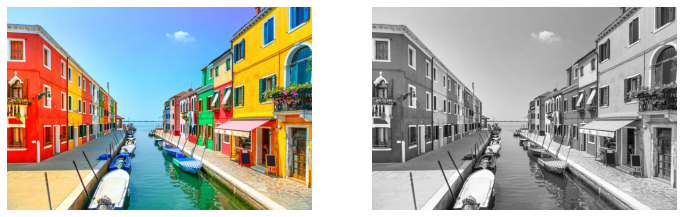

In [10]:
from PIL import Image
%matplotlib inline

img = Image.open('italy.jpg')
gray_img = Image.open('gray_italy.jpg')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(np.array(img))
ax[0].axis('off')            
ax[1].imshow(np.array(gray_img), cmap='gray')
ax[1].axis('off')
plt.show()

### <span style="color:red">Exercise</span>

Write a function that returns the grayscale of an image.

### <span style="background-color:lightblue">Answer</span>

In [ ]:
# student answer here

In [11]:
# solution
# def rgb2gray(img):
#     img = np.array(img)
#     return np.dot(img, [0.2989, 0.5870, 0.1140])

### <span style="color:red">Exercise</span>

What happens if we replace the RGB vector with the scaled norm of the vector? That means we need to calculate the norm of the vector $(R,G,B)$ and then divide by the maximum value the norm can be. Write a function that finds this new kind of 'grayscale' image. Display the result.

### <span style="background-color:lightblue">Answer</span>

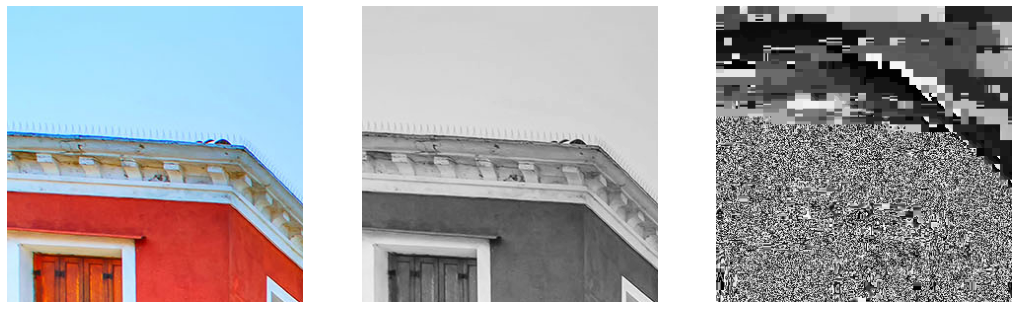

In [12]:
# student answer here

In [ ]:
# partial solution
img = np.array(img)[:300,:300]
gray1 = np.dot(img, [0.2989, 0.5870, 0.1140])
gray2 = np.zeros(img.shape[:2])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gray2[i,j] = np.dot(img[i,j],img[i,j])*255/(3*255**3)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax[0].imshow(img)
ax[0].axis('off')            
ax[1].imshow(gray1, cmap='gray')
ax[1].axis('off')
ax[2].imshow(gray2, cmap='gray')
ax[2].axis('off')
plt.show()


Now, suppose we are only able to use 10 gray values instead of the usual 256. We can do this with a quantization algorithm.
Uniform quantization is a simple type of quantization where the quantization levels are equally spaced. Here's how the uniform quantization function looks.


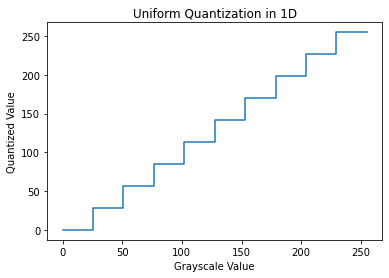

In [13]:
num_levels=10
x = np.linspace(0,255,num_levels+1)
y = np.linspace(0,255,num_levels)
  
plt.step(x, np.append(y,y[-1]), where='post')
plt.xlabel('Grayscale Value')
plt.ylabel('Quantized Value')
plt.title('Uniform Quantization in 1D')
plt.show()


### <span style="color:red">Exercise</span>

In your own words, explain how to read the graph above as if you were talking to a friend who has never learned about color science. 

### <span style="background-color:lightblue">Answer</span>

*student answer here*

### <span style="color:red">Exercise</span>

Write a function that converts an image to grayscale and then uniformly quantizes the gray image with $k$ levels. Show your results when $k=2,10,24,$ and $100$.

### <span style="background-color:lightblue">Answer</span>

In [14]:
# student answer here

We can also quantize color images. Let's define our own palette of colors and map each to pixel to 1 of 4 options based on Euclidean distance.
The distance between the two colors $(R_1,G_1,B_1)$ and $(R_2,G_2,B_2)$ is $
    d = \sqrt{ (R_1-R_2)^2 + (G_1-G_2)^2 + (B_1-B_2)^2 }.$
    
### <span style="color:red">Exercise</span>

__Part 1:__ Choose your own palette of at least 4 colors and write a function that quantizes a color image to your palette based on the shortest Euclidean distance among the chosen colors.

__Part 2:__ Quantize your image again but this time based on the shortest Euclidean distance in a different color space, namely the CIE L\*a\*b\* space. That is, transform the RGB vectors to L\*a\*b\* vectors and then compute the distance between the two L\*a\*b\* vectors. See the example below on how to convert from RGB to CIE L\*a\*b\*.

In [15]:
from skimage import color # will need to add skimage to science environment
rgb = np.array([0,0,255])                           #RGB coordinates
lab = color.rgb2lab(rgb/255, illuminant="D65")      #Lab coordinates
print('RGB {} -> Lab {}'.format(rgb,lab))

RGB [  0   0 255] -> Lab [  32.29567257   79.18559091 -107.85730021]


__Part 3:__ Do you notice any differences in the two quantization methods? What if you add more or less colors to your palette?

### <span style="background-color:lightblue">Answer</span>


In [16]:
# student answer here

There are methods for adaptive color quantization. Based on the image, the palette of colors changes. We won't explore them for now, but here's an example where the 'best' 15 colors are chosen

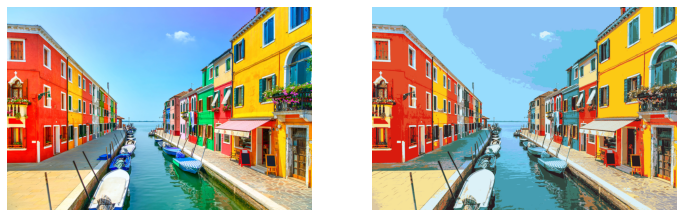

In [17]:
img = Image.open('italy.jpg')
quant_img = img.quantize(colors=15)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(img)
ax[0].axis('off')            
ax[1].imshow(quant_img)
ax[1].axis('off')
plt.show()

## Gamma Correction

Consider the game of "guess how many jellybeans (or other small objects) are in the jar". This game would be very uninteresting if there were only 4 jellybeans in the jar. We would have a much harder time visually distinguishing between 140 and 141 jellybeans, but there is some threshold where, say, 180 jellybeans looks noticeably different from 140 jellybeans. If you've been in a psychology class, you may have heard of [Weber's Law](https://en.wikipedia.org/wiki/Weber%E2%80%93Fechner_law), which quantifies human perception in response to a stimulus like an increase in jellybeans. Weber's Law suggests that this threshold is proportional to the relative stimulus increment. In other words, if $dV$ is a just perceivable difference in the amount of jellybeans $J$, then for a constant $\alpha$, $
    dV = \alpha \frac{dJ}{J}.$
Integrating both sides, we get $
    V = \alpha \ln(J).$
Weber's Law also applies to how we perceive light and color. The relationship we just derived suggests that we should quantize color levels logarithmically instead of uniformly so the levels are farther apart as the value increases. 


### <span style="color:red">Exercise</span>

__Part 1:__
Write a script that displays Purdue Old Gold on the NeoPixels. Reference the first lab on color for how to wire up the NeoPixels.

It doesn't look quite right. That's because according to Weber's Law we need to adjust the brightness levels for the NeoPixel to be logarithmic. This process is called *gamma correction*. The new gamma corrected RGB values are $
    R_{new} = 255(R/255)^\gamma, \quad G_{new} = 255(G/255)^\gamma, \quad B_{new} = 255(B/255)^\gamma.$
Typically, $\gamma=2.2$ for cameras and scanners. 

__Part 2:__
Write a function that gamma corrects an input of RGB values. What does Purdue gold look like now? Try different values for $1 \leq \gamma \leq 10$. Report your findings. 

### <span style="background-color:lightblue">Answer</span>

In [ ]:
# run this to display you answer for part 1
print(open('part1_answer.py', 'r').read()) 

In [ ]:
# student answer for part 2

In [18]:
# partial solution for part 2
gamma = 2.2
gold = np.array([206, 184, 136])
print(np.round(255*(gold/255)**(gamma)))


[159. 124.  64.]


## <span style="color:green">Reflection</span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

### <span style="background-color:lightblue">Answer</span>